In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [145]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [146]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [147]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [148]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [149]:
train['Embarked'].fillna('S',inplace=True)


In [150]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [151]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [152]:
gen_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), size=177)


In [153]:
train['Age'][np.isnan(train['Age'])]=gen_age


C:\Users\pc\AppData\Local\Temp\ipykernel_9944\3994455355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][np.isnan(train['Age'])]=gen_age


In [154]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [155]:
gen_age1=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), size=86)


In [156]:
test['Age'][np.isnan(test['Age'])]=gen_age1


C:\Users\pc\AppData\Local\Temp\ipykernel_9944\1683556251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][np.isnan(test['Age'])]=gen_age1


In [157]:
test.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [158]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [159]:
train[['Pclass','Survived']].groupby('Pclass').mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [160]:
train[['Sex','Survived']].groupby('Sex').mean()


,Survived
Sex,
female,0.742038
male,0.188908


In [161]:
train[['Embarked','Survived']].groupby('Embarked').mean()


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


C:\Users\pc\AppData\Local\Temp\ipykernel_9944\126505223.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

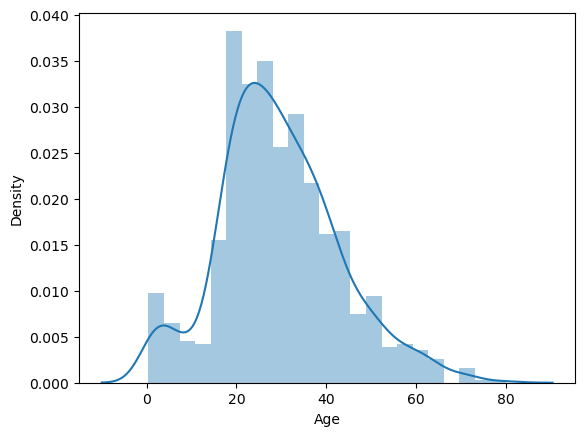

In [162]:
sns.distplot(train['Age'])


<Axes: >

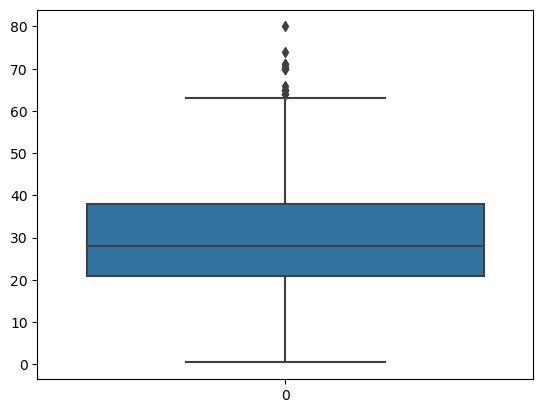

In [163]:
sns.boxplot(train['Age'])


In [164]:
train[train['Age']>75]['Survived'].value_counts()


Survived
1    1
Name: count, dtype: int64

C:\Users\pc\AppData\Local\Temp\ipykernel_9944\3289552761.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Survived']==0]['Age'])
C:\Users\pc\AppData\Local\Temp\ipykernel_9944\3289552761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

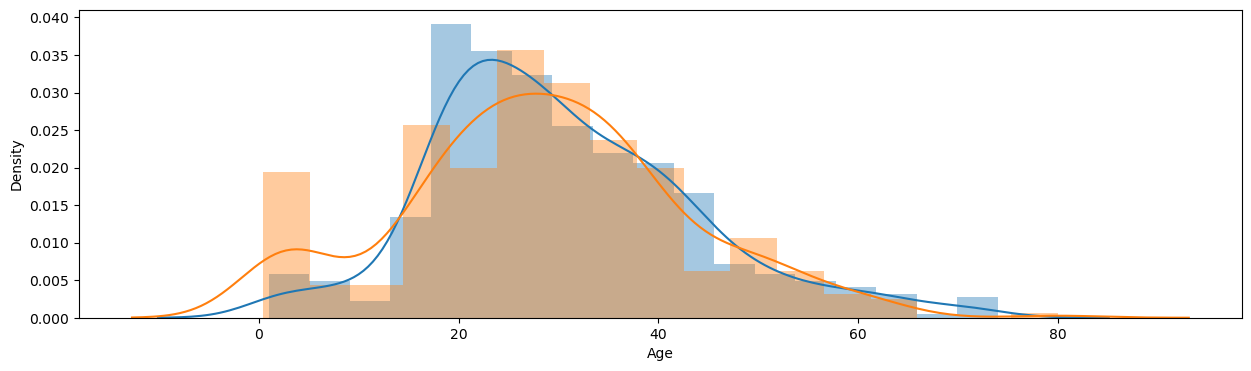

In [165]:
plt.subplots(figsize=(15,4))
sns.distplot(train[train['Survived']==0]['Age'])
sns.distplot(train[train['Survived']==1]['Age'])

In [166]:
passengerId=test['PassengerId'].values


In [167]:
train.drop(columns=['PassengerId','Ticket'],inplace=True)
test.drop(columns=['PassengerId','Ticket'],inplace=True)

In [168]:
train.isnull().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

C:\Users\pc\AppData\Local\Temp\ipykernel_9944\1818022599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

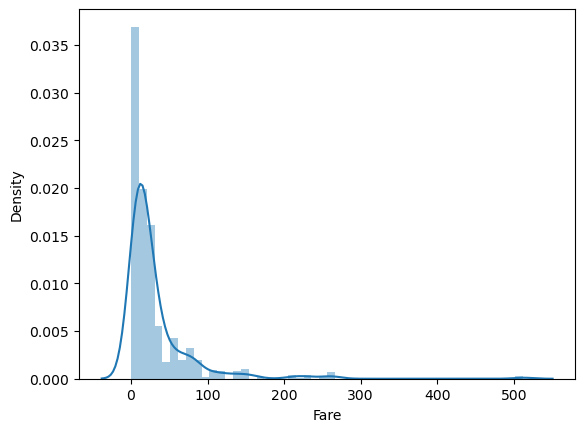

In [169]:
sns.distplot(train['Fare'])


<Axes: >

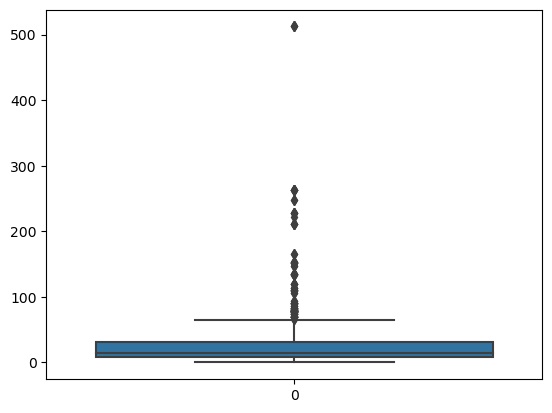

In [170]:
sns.boxplot(train['Fare'])


In [171]:
train[train['Fare']>400]['Survived'].value_counts()


Survived
1    3
Name: count, dtype: int64

C:\Users\pc\AppData\Local\Temp\ipykernel_9944\250516256.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Survived']==0]['Fare'])
C:\Users\pc\AppData\Local\Temp\ipykernel_9944\250516256.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['Survived']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

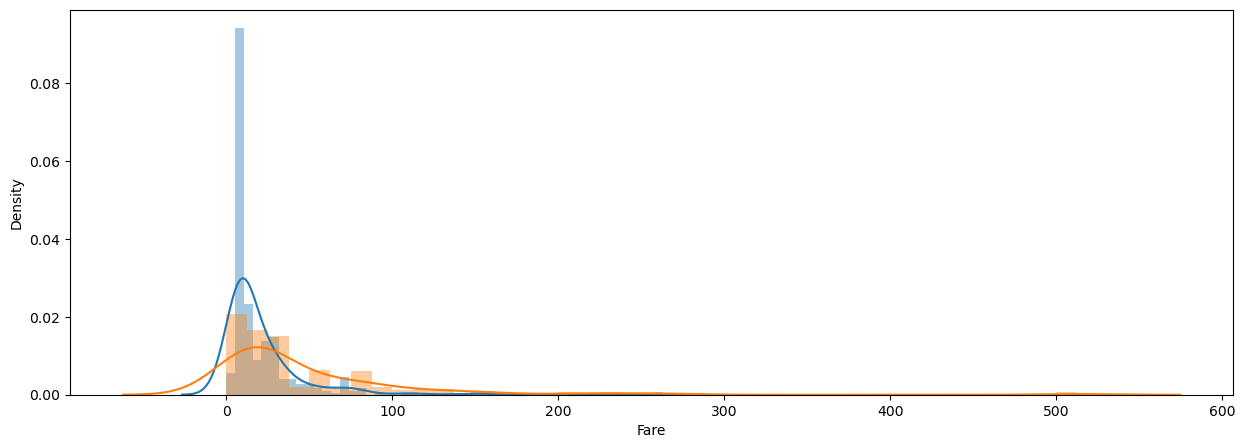

In [172]:
plt.subplots(figsize=(15,5))
sns.distplot(train[train['Survived']==0]['Fare'])
sns.distplot(train[train['Survived']==1]['Fare'])

In [173]:
# Don't delete this unless its 1st Jan
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [174]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [175]:
train['family']=train['SibSp'] + train['Parch'] + 1
test['family']=test['SibSp'] + test['Parch'] + 1

In [176]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [177]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [178]:
train[['family','Survived']].groupby('family').mean()


,Survived
family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [179]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [180]:
family_size(5)


'Large'

In [181]:
train['family_size']=train['family'].apply(family_size)


In [182]:
test['family_size']=test['family'].apply(family_size)


In [183]:
train.drop(columns=['family'],inplace=True)
test.drop(columns=['family'],inplace=True)

In [184]:
y=train['Survived'].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [185]:
train.drop(columns=['Survived'],inplace=True)


In [186]:
df=pd.DataFrame(test)
df=pd.DataFrame(train)

In [187]:
print(train.head())
print(test.head())


   Pclass     Sex   Age     Fare Embarked family_size
0       3    male  22.0   7.2500        S       Small
1       1  female  38.0  71.2833        C       Small
2       3  female  26.0   7.9250        S       Alone
3       1  female  35.0  53.1000        S       Small
4       3    male  35.0   8.0500        S       Alone
   Pclass     Sex   Age     Fare Embarked family_size
0       3    male  34.5   7.8292        Q       Alone
1       3  female  47.0   7.0000        S       Small
2       2    male  62.0   9.6875        Q       Alone
3       3    male  27.0   8.6625        S       Alone
4       3  female  22.0  12.2875        S       Small


In [188]:
print(train.shape)
print(test.shape)

(891, 6)
(418, 6)


In [189]:
print(type(train))
print(type(test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [190]:
pd.DataFrame(test)

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,male,34.5,7.8292,Q,Alone
1,3,female,47.0,7.0000,S,Small
2,2,male,62.0,9.6875,Q,Alone
3,3,male,27.0,8.6625,S,Alone
4,3,female,22.0,12.2875,S,Small
...,...,...,...,...,...,...
413,3,male,27.0,8.0500,S,Alone
414,1,female,39.0,108.9000,C,Alone
415,3,male,38.5,7.2500,S,Alone
416,3,male,17.0,8.0500,S,Alone


In [191]:
pd.DataFrame(train)

,Pclass,Sex,Age,Fare,Embarked,family_size
0,3,male,22.0,7.2500,S,Small
1,1,female,38.0,71.2833,C,Small
2,3,female,26.0,7.9250,S,Alone
3,1,female,35.0,53.1000,S,Small
4,3,male,35.0,8.0500,S,Alone
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,S,Alone
887,1,female,19.0,30.0000,S,Alone
888,3,female,16.0,23.4500,S,Small
889,1,male,26.0,30.0000,C,Alone


In [195]:
final = pd.concat([train, test], ignore_index=True)


In [196]:
final.shape


(1309, 6)

In [197]:
final=pd.get_dummies(final, columns=['Pclass','Sex','Embarked','family_size'], drop_first=True)


In [198]:
Xf=final.tail(418).values


In [199]:
X=final.head(891).values


In [200]:
X.shape


(891, 9)

In [201]:
y.shape


(891,)

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [203]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [204]:
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [206]:
y_pred=clf.predict(X_test)


In [207]:
y_pred.shape


(179,)

In [208]:
y_test.shape


(179,)

In [209]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8044692737430168

In [210]:
yf=clf.predict(Xf)


In [211]:
yf.shape


(418,)

In [212]:
submission=pd.DataFrame()


In [213]:
submission['PassengerId']=passengerId
submission['Survived']=yf

In [215]:
submission.to_csv('submission.csv', index=False)
